# Homework 3

## By Team VC

### Intro into bipartite networks

For this week's task, we looked in the Davis club network. The network consist of 18 nodes, which represents Davis club members. Each edge is their attendance to a shared meeting. For the analysis, we uses [Networkx's](https://networkx.org/documentation/stable/auto_examples/algorithms/plot_davis_club.html) Davis club code below to start out the example. From the documentation code, it appears Theresa has the most friendships within the club based on the degree score and her share friendship score. She is very interconnected in the club meetings, so she should appear in the majority of club meetings. We will see if this assumption is true later on.

The graph provided does make the network appear as a unipartite network rather than a bipartite. Let's change the graph format to show the network as 2 mode with the bipartite layout function.

In [15]:
#Code is derive from Networkx's Davis Club Documentation 
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import networkx.algorithms.bipartite as bipartite

G = nx.davis_southern_women_graph()
women = G.graph["top"]
clubs = G.graph["bottom"]

print("Biadjacency matrix")
print(bipartite.biadjacency_matrix(G, women, clubs))

Biadjacency matrix
  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 4)	1
  (0, 5)	1
  (0, 7)	1
  (0, 8)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 4)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1
  (2, 1)	1
  (2, 2)	1
  (2, 3)	1
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (2, 8)	1
  (3, 0)	1
  (3, 2)	1
  :	:
  (12, 7)	1
  (12, 8)	1
  (12, 9)	1
  (12, 11)	1
  (12, 12)	1
  (12, 13)	1
  (13, 5)	1
  (13, 6)	1
  (13, 8)	1
  (13, 9)	1
  (13, 10)	1
  (13, 11)	1
  (13, 12)	1
  (13, 13)	1
  (14, 6)	1
  (14, 7)	1
  (14, 9)	1
  (14, 10)	1
  (14, 11)	1
  (15, 7)	1
  (15, 8)	1
  (16, 8)	1
  (16, 10)	1
  (17, 8)	1
  (17, 10)	1


/var/folders/gb/px8llt0d2sxd7w4r4_tm9g1h0000gn/T/ipykernel_8332/1795651374.py:12: FutureWarning: biadjacency_matrix will return a scipy.sparse array instead of a matrix in NetworkX 3.0
  print(bipartite.biadjacency_matrix(G, women, clubs))


In [13]:
output_list=[]
print()
#print("#Friends, Member")
for w in women:
    #print(f"{W.degree(w)} {w}")
    output_list.append([f"{W.degree(w)}", f"{w}"])
output_df = pd.DataFrame(output_list, columns=['#Friends', 'Member'])
output_df.sort_values('#Friends',ascending=False).head(10)


,#Friends,Member
0,17,Evelyn Jefferson
8,17,Ruth DeSand
14,17,Helen Lloyd
13,17,Nora Fayette
12,17,Sylvia Avondale
9,17,Verne Sanderson
2,17,Theresa Anderson
7,16,Pearl Oglethorpe
10,16,Myra Liddel
11,16,Katherina Rogers


In [44]:
output_list = []

# project bipartite graph onto women nodes keeping number of co-occurence
# the degree computed is weighted and counts the total number of shared contacts
W = bipartite.weighted_projected_graph(G, women)
print()
#print("#Friend meetings, Member")
for w in women:
    #print(f"{W.degree(w, weight='weight')} {w}")
    output_list.append([f"{W.degree(w, weight='weight')}", f"{w}"])
output_df = pd.DataFrame(output_list, columns=['#Friend meetings', 'Member'])
output_df.sort_values('#Friend meetings',ascending=False).head(10)



,#Friend meetings,Member
2,57,Theresa Anderson
0,50,Evelyn Jefferson
3,46,Brenda Rogers
12,46,Sylvia Avondale
1,45,Laura Mandeville
13,43,Nora Fayette
8,40,Ruth DeSand
9,38,Verne Sanderson
11,37,Katherina Rogers
6,36,Eleanor Nye


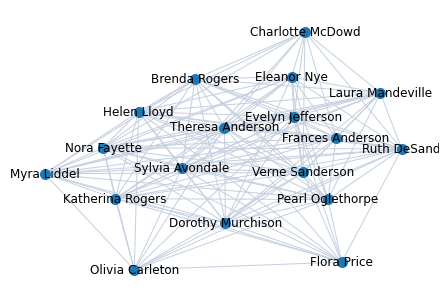

In [43]:
pos = nx.spring_layout(W, seed=648) 
nx.draw(W, with_labels=True,node_size=100, width=1, edge_color='#c5d0e0')
plt.show()

We see members with the highest number of friends & meetings are located in the center of the women's graph.

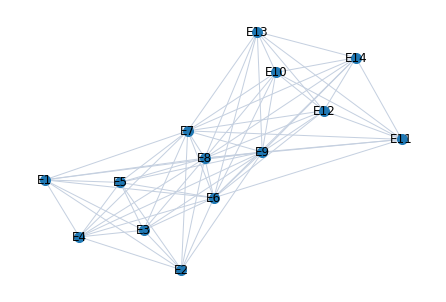

In [47]:
E = bipartite.weighted_projected_graph(G, clubs)
pos = nx.spring_layout(E, seed=648)  # Seed layout for reproducible node positions
nx.draw(E, with_labels=True,node_size=100, width=1, edge_color='#c5d0e0')
plt.show()


As expected, much like the women's graph, the events in the middle have the highest degree as well.

### Displaying as a bipartite network

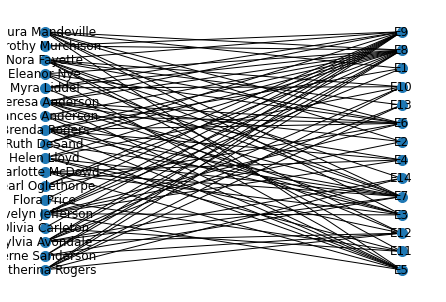

In [17]:
# using the bipartite layout for clarity
pos=nx.bipartite_layout(G,women)
nx.draw(G, pos,with_labels=True,node_size=100)

In [18]:
#Lets calculate the bipartite centrality of the clubs network!
club_cent=sorted(nx.bipartite.degree_centrality(G,clubs).items() , key=lambda x: x[1], reverse=True)
print(club_cent[0:4])

[('E8', 0.7777777777777777), ('E9', 0.6666666666666666), ('Evelyn Jefferson', 0.5714285714285714), ('Theresa Anderson', 0.5714285714285714)]


### Eigenvector Centrality Of Members

To further support the above findings, we show how the highest degree members also have the highest eigenvector centrality. One interesting case is Ruth DeSand who didn't attend as many meetings as Theresa Anderson or Evelyn Jefferson but still has a high eigenvector centrality. But because she attended the 'right' meeting with the other central members, she gets close to the entire network.

In [49]:
sorted_eigenvector = sorted(nx.eigenvector_centrality(W).items(), 
                            key=lambda x: x[1], 
                            reverse=True)
pd.DataFrame(sorted_eigenvector, columns=['Member','Eigenvector Centrality']).head(20)


,Member,Eigenvector Centrality
0,Evelyn Jefferson,0.253524
1,Theresa Anderson,0.253524
2,Ruth DeSand,0.253524
3,Verne Sanderson,0.253524
4,Sylvia Avondale,0.253524
5,Nora Fayette,0.253524
6,Helen Lloyd,0.253524
7,Pearl Oglethorpe,0.243157
8,Myra Liddel,0.243157
9,Katherina Rogers,0.243157


### Clubs and its members

It appears that clubs E8 and E9 has the highest degree centrality, which means these two clubs are most popular amongst Davis members. We can expand on these two graphs with a subgraph function. Let's filter for E8 and E9's network with the ego graph funtion. This function will return a subgraph of nodes whose directly connected to these specific clubs

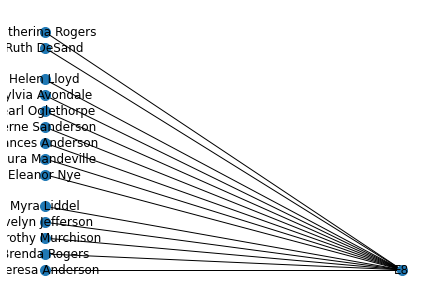

In [3]:
#Create a list with only E8 and E9 clubs
E8_G=nx.ego_graph(G, 'E8', radius=1)
pos=nx.bipartite_layout(E8_G,women)
nx.draw(E8_G, pos,with_labels=True,node_size=100)


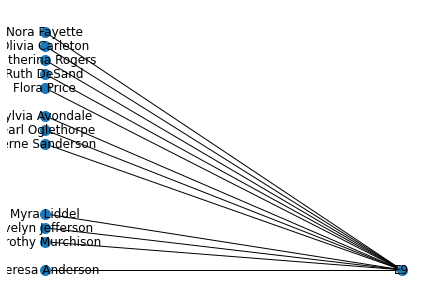

In [4]:
#E9 Graph representation
E9_G=nx.ego_graph(G, 'E9', radius=1)
pos=nx.bipartite_layout(E9_G,women)
nx.draw(E9_G, pos,with_labels=True,node_size=100)


[('Nora Fayette', 0.10858130346049079), ('Evelyn Jefferson', 0.09243053952845212), ('Theresa Anderson', 0.08382717212549207)]


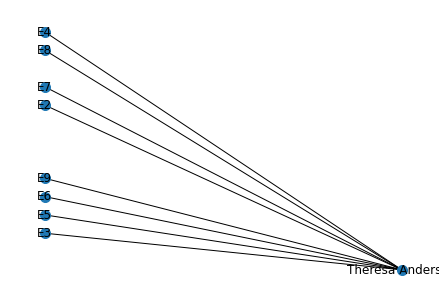

In [5]:
#Take a peak at theresa's club memebership
E9_G=nx.ego_graph(G, 'Theresa Anderson', radius=1)
pos=nx.bipartite_layout(E9_G,clubs)
nx.draw(E9_G, pos,with_labels=True,node_size=100)

#seeing if Theresa also had the highest between closeness score
women_close =sorted(nx.betweenness_centrality(G).items() , key=lambda x: x[1], reverse=True)

#Range starts at the first highest women node
print(women_close[3:6])

### Member Analysis

It is not a suprise that Theresa appears in both high member meetings. It appears all the popular members like Evelyn or Theresa are at half of the  club meetings, which ensures their high co-occurences counts. It does not mean memeberships with the high degree clubs guarantee a high degree score, as Olivia Cartlon is a part of E9 but has a score of 12. Now, lets see if a member with a high degree also has the best shortest path.

We use the betweeness centrality score to measure the member's connections in the graph. The results reveal that Nora is the most influential person in the club due to her centrality score. Nora does have a degree of 17 but she does not share the highest co-occurences. This can be interpreted that Nora has the most unqiue friendships compared to other members. 

